# Running multiple linear regression algorithm on Happiness data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

### Checking dataset. Checking for null values. Expecting 'false' output

In [2]:
dataset = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\FINALMERGE.csv')
val_set = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\ValidationSet.csv')
print(dataset.shape)
print(dataset.describe)
print(dataset.isnull().any())

(139, 14)
<bound method NDFrame.describe of      Unnamed: 0  Happiness.Score  GDP per capita (current US$)  \
0             0            7.537                       74185.5   
1             1            7.522                       53149.3   
2             2            7.504                       50936.0   
3             3            7.494                       80831.1   
4             4            7.469                       42148.1   
..          ...              ...                           ...   
134         146            3.471                         697.3   
135         147            3.462                        1534.5   
136         148            3.349                         877.3   
137         149            2.905                         244.6   
138         150            2.693                         333.2   

     Employment: Services (% of employed)  \
0                                    77.6   
1                                    78.4   
2                           

### Creating x and y axis

In [3]:
X = dataset[['GDP per capita (current US$)',
             'Employment: Services (% of employed)', 
             'Urban population (% of total population)', 
             'Infant mortality rate (per 1000 live births', 
             'Mobile-cellular subscriptions (per 100 inhabitants).1', 
             'Female Life Expectancy at birth (years)', 
             'Population % not viewing religion as important', 
             'Civil Liberties', 
             '2016 EPI Score', 
             'EH - Water and Sanitation',
             'Learning-Adjusted Years of School',
             'HUMAN CAPITAL INDEX']]
y = dataset['Happiness.Score']

### Average value of Happiness score

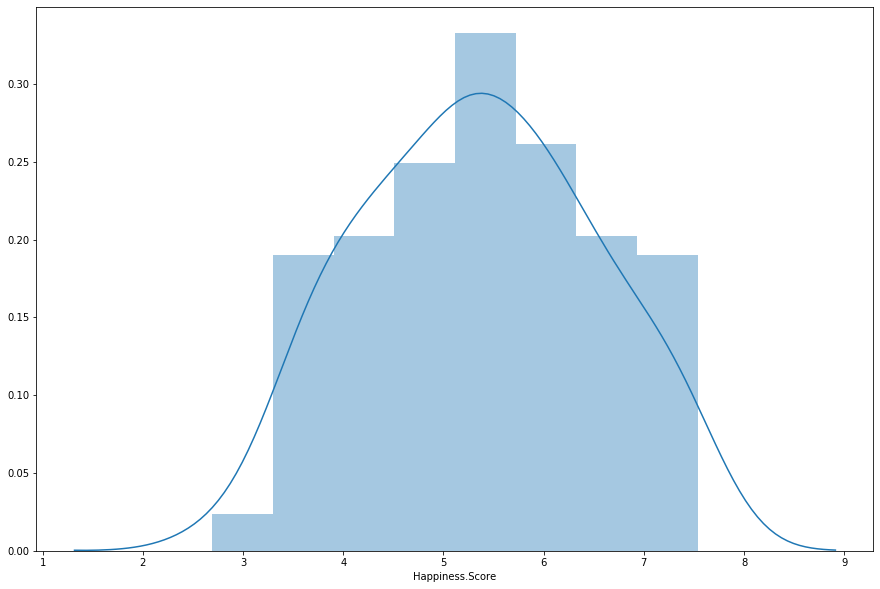

In [4]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Happiness.Score'])

### Split data: 80% to training data and 20% to test data

In [5]:
(X_train, 
 X_test, 
 y_train, 
 y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the data

In [6]:
regressor = lr()  
regressor.fit(X_train, y_train)

pred_train_lr= regressor.predict(X_train)
#test mean squared error and r2 score on train data
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

0.5589049618716961
0.7652784521416993


### Viewing what co-efficients the model has chosen. Human capital index has the greatest effect on happiness score.

In [7]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

                                                    Coefficient
GDP per capita (current US$)                           0.000015
Employment: Services (% of employed)                   0.004203
Urban population (% of total population)               0.004877
Infant mortality rate (per 1000 live births            0.019958
Mobile-cellular subscriptions (per 100 inhabita...     0.005559
Female Life Expectancy at birth (years)                0.075149
Population % not viewing religion as important        -0.005226
Civil Liberties                                       -0.021848
2016 EPI Score                                         0.000720
EH - Water and Sanitation                              0.009274
Learning-Adjusted Years of School                      0.231473
HUMAN CAPITAL INDEX                                   -3.140211


### Viewing the prediction on the test data. Output shows the difference between actual and predicted score.

MSE: 0.43538464753908057
R2: 0.6815833282896258
RMSE:  0.6598368340272317
     Actual  Predicted
8     7.284   6.825149
90    4.775   5.598026
120   3.936   3.400756
109   4.291   4.180514
27    6.452   5.850686
101   4.545   4.912466
60    5.500   5.601412
96    4.644   5.542682
113   4.139   4.095770
121   3.875   3.919452
26    6.454   5.197374
89    4.829   4.660307
24    6.527   6.614089
110   4.286   5.271279
91    4.735   4.916978
59    5.525   5.241006
135   3.462   5.135121
51    5.825   5.609245
119   3.970   4.433487
106   4.440   5.095123
33    6.168   5.718647
22    6.609   6.011682
2     7.504   6.996743
118   4.028   3.372118
62    5.472   6.847181


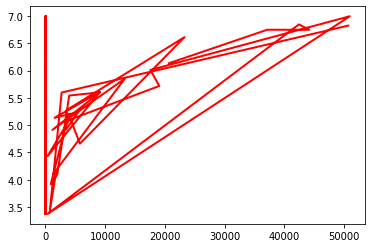

-2.288763920433343


In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
#print meansquared error and r2 score for test data and prediction actual comparison
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print ('RMSE: ', np.sqrt(mse))
print(df1)
# interceptplt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print(regressor.intercept_)

### Plotting of the above data on a bar chart. Returning good prediction results?

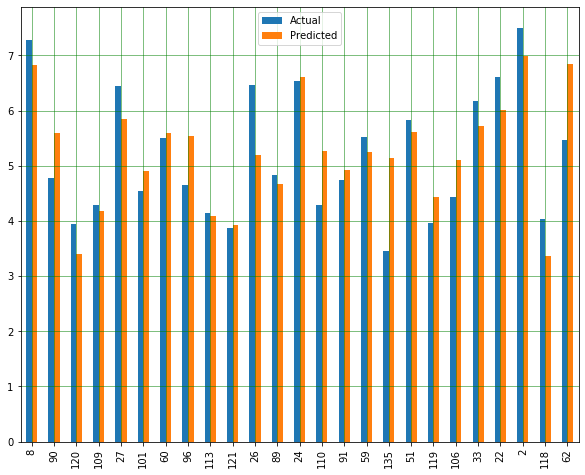

In [9]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluation of performance of this algorithm. Looking for RMSE as close to 0 as possible- result is @10% on mean value? Indicative of an algo that is not very accurate but still makes good predictions? 
#### Factors that contribute to inaccuracy: 
 - Need for more data: large amount of data needed for the best result
 - Bad assumptions: linear relationship?
 - Poor features: did the features we chose have the best correlation

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5148587899046813
Mean Squared Error: 0.43538464753908057
Root Mean Squared Error: 0.6598368340272317


In [11]:
# test on holdout set
actual = val_set['Happiness.Score']
val_set.drop(columns = 'Happiness.Score', inplace = True)
val_set.drop(columns = 'Unnamed: 0', inplace = True)


In [12]:
val_pred = regressor.predict(val_set)
print('MSE:', mean_squared_error(actual, val_pred))
print('R2:', r2_score(actual, val_pred))
df_val = pd.DataFrame({'Actual': actual, 'Predicted': val_pred, 'Difference': actual - val_pred})
mse = mean_squared_error(actual, val_pred)
print ('RMSE: ', np.sqrt(mse))

print(df_val)
print(df_val.max())
print(df_val.min())

MSE: 0.19111303554314085
R2: 0.7228629878649973
RMSE:  0.4371647693297584
    Actual  Predicted  Difference
0    4.497   4.700276   -0.203275
1    5.823   5.403190    0.419810
2    4.805   5.366922   -0.561922
3    5.872   5.414619    0.457381
4    6.572   7.175494   -0.603494
5    5.004   4.903661    0.100339
6    5.175   5.349010   -0.174010
7    5.621   6.382320   -0.761320
8    6.599   6.206711    0.392289
9    4.292   4.487594   -0.195594
10   4.168   4.472898   -0.304898
11   6.344   5.813369    0.530631
Actual        6.599000
Predicted     7.175494
Difference    0.530631
dtype: float64
Actual        4.168000
Predicted     4.472898
Difference   -0.761320
dtype: float64


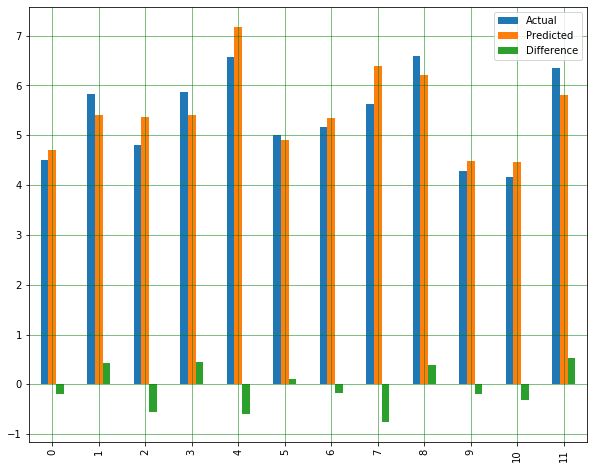

In [13]:
df_val.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
#grid search


In [15]:
# Linear Regression without GridSearch

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


X = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\FINALMERGE.csv')
y = X['Happiness.Score']
X.drop(columns = 'Happiness.Score', inplace = True)
X.drop(columns = 'Unnamed: 0', inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)    #It's good practice to check



(111, 12) (111,)
(28, 12) (28,)


In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

regressor = lr()


scores = cross_val_score(regressor, X_train, y_train, cv = 5)    

print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regressor, X_test, y_test, cv = 5)    
accuracy = metrics.r2_score(y_test, predictions)  #accuracy of the predictions from the best cv fold




[0.46872451 0.83384175 0.69097253 0.66091029 0.71404539] 0.6736988930566812 0.1181101173238931


In [17]:
regressor.fit(X_train, y_train)

y_hat = regressor.predict(X_test)      #this gives me my predictions

regressor.score(X_test, y_test)     #this tells me my model performance


0.5331930162976112

In [18]:
print(y_hat)
print(y_test)
difference = y_hat - y_test
print(difference)

[5.73829977 5.67807768 5.28206955 5.82946484 4.94645238 5.55813116
 6.72040779 6.33622664 5.33954112 5.60187351 3.70425145 5.39483857
 6.95299505 5.47303265 7.0307001  4.95585746 3.42850936 6.10834795
 5.88549484 6.5850242  3.74951387 5.46249321 5.44137586 5.00092518
 4.39927226 4.98789438 5.9020999  4.45457233]
33     6.168
23     6.578
107    4.376
66     5.324
50     5.838
64     5.395
16     6.891
79     5.195
55     5.715
73     5.237
105    4.460
61     5.493
13     6.993
53     5.819
2      7.504
81     5.181
130    3.591
57     5.611
11     7.079
30     6.403
117    4.032
51     5.825
60     5.500
26     6.454
102    4.535
38     6.071
47     5.902
84     5.074
Name: Happiness.Score, dtype: float64
33    -0.429700
23    -0.899922
107    0.906070
66     0.505465
50    -0.891547
64     0.163131
16    -0.170592
79     1.141226
55    -0.375459
73     0.364874
105   -0.755749
61    -0.098161
13    -0.040005
53    -0.345967
2     -0.473300
81    -0.225143
130   -0.162491
57     0.497

In [27]:
#view mean difference
dfnew = pd.DataFrame({'LR Difference': df_val['Difference'], 'GridSearch Difference': difference})
print(dfnew['LR Difference'].mean())
print(dfnew['GridSearch Difference'].mean())

-0.07533869333232716
-0.22486631748780278


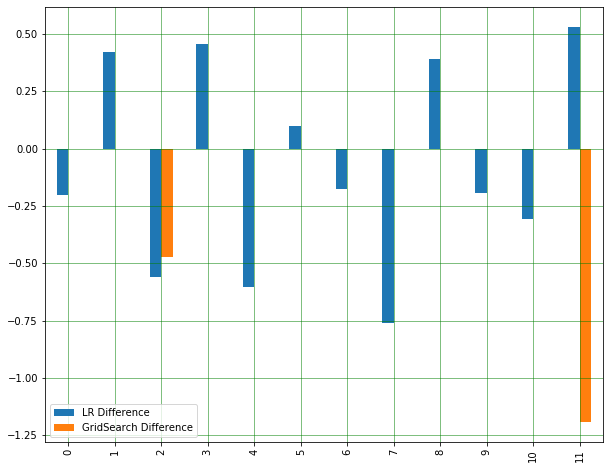

In [25]:
dfnew.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [71]:

val_set = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\ValidationSet.csv')
val_set.drop(columns = 'Unnamed: 0', inplace = True)

In [72]:
actual = val_set['Happiness.Score']
val_set.drop(columns = 'Happiness.Score', inplace = True)


In [73]:

y_hat = regressor.predict(val_set)     #this gives me my predictions
print(y_hat)
dfcompare = pd.DataFrame({'Actual': actual, 'Predicted': y_hat, 'Difference': actual - val_pred})

[4.8371695  5.40513259 5.49194663 5.48538886 7.16431438 5.0092367
 5.40564159 6.35794206 6.19725854 4.6223754  4.42741862 5.77597375]


In [74]:
print(dfcompare)
dfcompare.drop(columns = 'Difference', inplace = True)


    Actual  Predicted  Difference
0    4.497   4.837170   -0.203275
1    5.823   5.405133    0.419810
2    4.805   5.491947   -0.561922
3    5.872   5.485389    0.457381
4    6.572   7.164314   -0.603494
5    5.004   5.009237    0.100339
6    5.175   5.405642   -0.174010
7    5.621   6.357942   -0.761320
8    6.599   6.197259    0.392289
9    4.292   4.622375   -0.195594
10   4.168   4.427419   -0.304898
11   6.344   5.775974    0.530631


In [75]:
print('mse', mean_squared_error(actual, val_pred))
mse = mean_squared_error(actual, val_pred)
print('r2:', r2_score(actual, val_pred))
print ('RMSE: ', np.sqrt(mse))
#same score

mse 0.19111303554314085
r2: 0.7228629878649973
RMSE:  0.4371647693297584


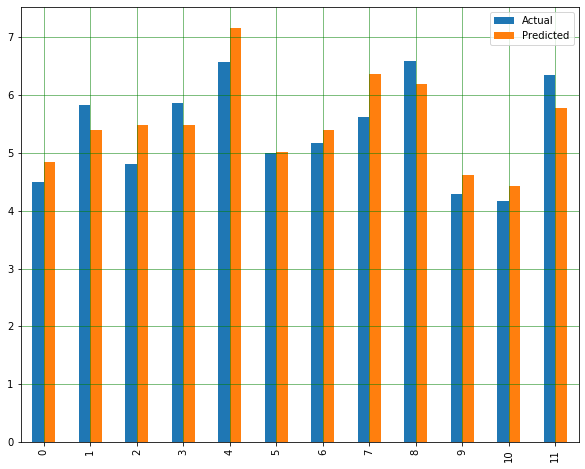

In [78]:
dfcompare.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

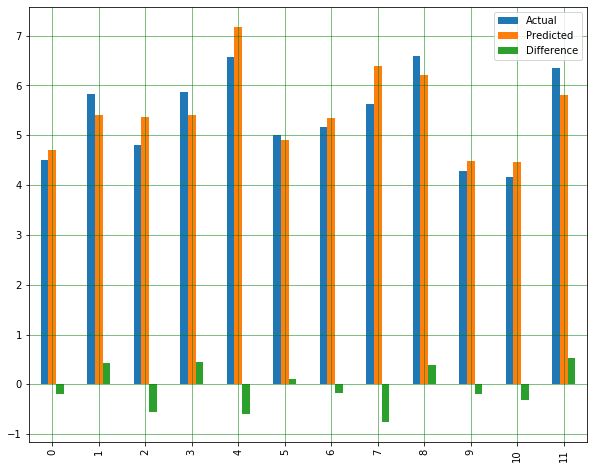

In [77]:
df_val.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [4]:
dataset = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\FINALMERGE.csv')
val_set = pd.read_csv(r'C:\Users\jackm\Documents\Data Analytics\CW\ValidationSet.csv')
print(dataset.shape)
print(dataset.describe)
print(dataset.isnull().any())

(139, 14)
<bound method NDFrame.describe of      Unnamed: 0  Happiness.Score  GDP per capita (current US$)  \
0             0            7.537                       74185.5   
1             1            7.522                       53149.3   
2             2            7.504                       50936.0   
3             3            7.494                       80831.1   
4             4            7.469                       42148.1   
..          ...              ...                           ...   
134         146            3.471                         697.3   
135         147            3.462                        1534.5   
136         148            3.349                         877.3   
137         149            2.905                         244.6   
138         150            2.693                         333.2   

     Employment: Services (% of employed)  \
0                                    77.6   
1                                    78.4   
2                           

In [5]:
dataset.drop(columns = 'Population % not viewing religion as important', inplace = True)
val_set.drop(columns = 'Population % not viewing religion as important', inplace = True)

In [6]:
X = dataset[['GDP per capita (current US$)',
             'Employment: Services (% of employed)', 
             'Urban population (% of total population)', 
             'Infant mortality rate (per 1000 live births', 
             'Mobile-cellular subscriptions (per 100 inhabitants).1', 
             'Female Life Expectancy at birth (years)', 
             'Civil Liberties', 
             '2016 EPI Score', 
             'EH - Water and Sanitation',
             'Learning-Adjusted Years of School',
             'HUMAN CAPITAL INDEX']]
y = dataset['Happiness.Score']

In [7]:
(X_train, 
 X_test, 
 y_train, 
 y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
regressor = lr()  
regressor.fit(X_train, y_train)

pred_train_lr= regressor.predict(X_train)
#test mean squared error and r2 score on train data
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

0.5644286804075425
0.7606159683365681


In [9]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
#print meansquared error and r2 score for test data and prediction actual comparison
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print ('RMSE: ', np.sqrt(mse))
print(df1)

MSE: 0.4310010879939945
R2: 0.6847892255312487
RMSE:  0.656506731110957
     Actual  Predicted
8     7.284   6.949255
90    4.775   5.473536
120   3.936   3.445619
109   4.291   4.173586
27    6.452   5.779414
101   4.545   4.895607
60    5.500   5.547392
96    4.644   5.642108
113   4.139   4.142878
121   3.875   3.927920
26    6.454   5.177740
89    4.829   4.685707
24    6.527   6.437436
110   4.286   5.214945
91    4.735   4.890407
59    5.525   5.243596
135   3.462   5.093846
51    5.825   5.490645
119   3.970   4.381818
106   4.440   5.003863
33    6.168   5.568331
22    6.609   6.124013
2     7.504   6.996633
118   4.028   3.393098
62    5.472   6.936662


In [10]:
val_set.drop(columns = 'Unnamed: 0', inplace = True)
actual = val_set['Happiness.Score']
val_set.drop(columns = 'Happiness.Score', inplace = True)

In [11]:
val_pred = regressor.predict(val_set)
print('MSE:', mean_squared_error(actual, val_pred))
print('R2:', r2_score(actual, val_pred))
df_val = pd.DataFrame({'Actual': actual, 'Predicted': val_pred, 'Difference': actual - val_pred})
mse = mean_squared_error(actual, val_pred)
print ('RMSE: ', np.sqrt(mse))

print(df_val)
print(df_val.max())
print(df_val.min())

MSE: 0.1831887386486104
R2: 0.7343541766181847
RMSE:  0.42800553576865147
    Actual  Predicted  Difference
0    4.497   4.797254   -0.300253
1    5.823   5.294018    0.528982
2    4.805   5.301708   -0.496708
3    5.872   5.350051    0.521949
4    6.572   7.025996   -0.453996
5    5.004   4.918623    0.085377
6    5.175   5.320665   -0.145665
7    5.621   6.278565   -0.657565
8    6.599   6.210399    0.388601
9    4.292   4.515857   -0.223857
10   4.168   4.441324   -0.273324
11   6.344   5.738773    0.605227
Actual        6.599000
Predicted     7.025996
Difference    0.605227
dtype: float64
Actual        4.168000
Predicted     4.441324
Difference   -0.657565
dtype: float64


[4.79725353 5.29401761 5.30170825 5.35005072 7.02599555 4.9186232
 5.32066484 6.27856487 6.21039866 4.51585656 4.44132434 5.73877271]
